In [40]:
import numpy as np
import pandas as pd

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

In [42]:
data=np.load('./data/data_100_100.npz')

In [43]:
data.files

['arr_0', 'arr_1']

In [44]:
X=data['arr_0'] # Independent Features
y=data['arr_1'] # Depemdemt Variables

In [45]:
X.shape

(1662, 10000)

In [46]:
y.shape

(1662,)

In [47]:
#EIGEN IMAGE
X1=X-X.mean(axis=0)

In [48]:
X1

array([[ 0.40107595,  0.4093792 ,  0.41625729, ...,  0.28347609,
         0.31346358,  0.36901678],
       [ 0.2834289 ,  0.23683018,  0.20841415, ..., -0.14397489,
        -0.16496779, -0.17608126],
       [-0.0302966 ,  0.07604587,  0.1142965 , ..., -0.06946509,
        -0.09045799, -0.1094146 ],
       ...,
       [-0.24990444, -0.30042472, -0.28178193, ...,  0.15798589,
         0.15660084,  0.1533305 ],
       [ 0.46382105,  0.4721243 ,  0.47900238, ..., -0.29691607,
        -0.29830113, -0.27804205],
       [ 0.51087988,  0.51918312,  0.52998278, ...,  0.58543687,
         0.58405182,  0.58078148]])

In [49]:
X

array([[0.85098039, 0.85098039, 0.85098039, ..., 0.67058824, 0.70196078,
        0.76078431],
       [0.73333333, 0.67843137, 0.64313725, ..., 0.24313725, 0.22352941,
        0.21568627],
       [0.41960784, 0.51764706, 0.54901961, ..., 0.31764706, 0.29803922,
        0.28235294],
       ...,
       [0.2       , 0.14117647, 0.15294118, ..., 0.54509804, 0.54509804,
        0.54509804],
       [0.91372549, 0.91372549, 0.91372549, ..., 0.09019608, 0.09019608,
        0.11372549],
       [0.96078431, 0.96078431, 0.96470588, ..., 0.97254902, 0.97254902,
        0.97254902]])

In [66]:
from sklearn.decomposition import PCA

In [67]:
pca=PCA(n_components=None,whiten=True,svd_solver='auto')

In [68]:
x_pca=pca.fit_transform(X1)

In [69]:
x_pca.shape

(1662, 1662)

In [70]:
eigen_ratio=pca.explained_variance_ratio_
eigen_ratio_cum=np.cumsum(eigen_ratio)

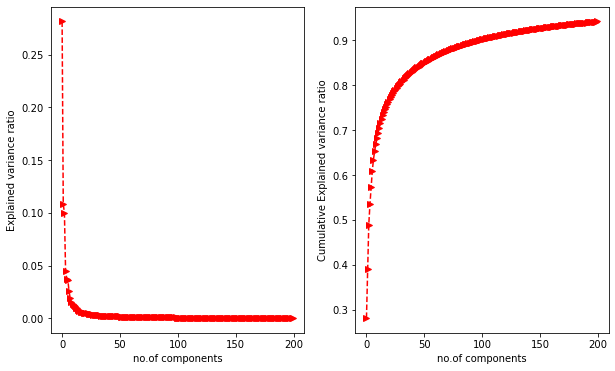

In [71]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no.of components')
plt.ylabel('Explained variance ratio')
plt.subplot(1,2,2)

plt.xlabel('no.of components')
plt.ylabel('Cumulative Explained variance ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')


In [72]:
# This tells us that by selecting 50 components we can retain 80 percent variance in data
# in real world variance is selected near 75-80 percent

In [73]:
# Conclusioin: This is known as elbow method to find number of useful components
# Since if 23 consider components between 25-30 then the explained variance is about 75 percent
# So in order to get minimum 80 percent varince we are considering 50 components

In [74]:
pca_50=PCA(n_components=50,whiten=True,svd_solver='auto')
x_pca_50=pca_50.fit_transform(X1)

In [75]:
x_pca_50.shape

(1662, 50)

In [60]:
# 10000 to 50 its Principal components

In [61]:
# saving pca

In [76]:
import pickle

In [77]:
pickle.dump(pca_50,open('./model/1pca_50.pickle','wb'))

In [78]:
#considering 50 components and inverse transforming it
x_pca_inv=pca_50.inverse_transform(x_pca_50)

In [ ]:
pca_50.transform

In [79]:
x_pca_inv.shape

(1662, 10000)

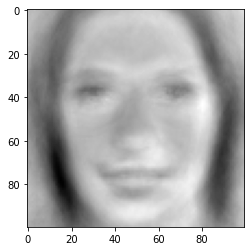

In [80]:
eig_image=x_pca_inv[0,:]
eig_image=eig_image.reshape((100,100))
plt.imshow(eig_image,cmap='gray')

In [81]:
#saving
np.savez('./data/data_pca_50_y_mean.pickle',x_pca_50,y,X.mean())